# THE MUSHROOM MURDERS: A Data Detective Story

---

### *"In a forest full of fungi, only the algorithm survives."*

---

### Don't Eat That! A Life-or-Death | Perfect Score

---

**Welcome to the most delicious homicide investigation in data science history.** We've got 8,124 mushrooms in custody - and here's the terrifying part: nearly half of them are cold-blooded killers. One wrong bite, and your last meal becomes your LAST meal. In this notebook, we're playing Detective Pandas and his trusty sidekick Scikit-Learn, diving deep into the UCI Mushroom Dataset to crack the code of fungal fatality. We'll interrogate every suspect through rigorous EDA, put each feature on the witness stand with Chi-Square tests and Cramer's V analysis, and uncover which characteristics scream "POISONOUS!" louder than others. Spoiler alert: if it smells foul, fishy, or pungent - RUN.

**But identifying killers visually isn't enough. We need PERFECT classification.** So we're throwing seven machine learning algorithms into the arena - Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, KNN, SVM, and Naive Bayes - and letting them fight for the crown. The stakes? Zero false negatives allowed. Because in mushroom classification, a false negative doesn't mean a bad grade - it means someone DIES. By the end of this investigation, we achieve what every data scientist dreams of: **100% accuracy, 100% precision, 100% recall.** Not a single killer escapes. Not a single innocent condemned. Case closed, lives saved, and you'll never look at a forest mushroom the same way again.

---

*"We've got 8,124 mushrooms in custody,"* the captain barked through the phone. *"Half of them are serial killers. The other half are innocent breakfast ingredients. We need you to figure out WHO IS WHO before someone makes a very fatal omelette."*

The stakes? **LIFE AND DEATH.**

The evidence? **22 suspicious features.**

The mission? **PERFECT CLASSIFICATION.**

Welcome to the most delicious homicide investigation in data science history.

---

## CHAPTER 1: Imports & Data Loading


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')  # Silencing the screams of deprecated functions

# Setting the mood lighting for our investigation
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("CRIME LAB STATUS: FULLY OPERATIONAL")
print("Detectives on duty: Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn")
print("Coffee consumed: Infinite")
print("\nLet's catch some killer mushrooms.")

CRIME LAB STATUS: FULLY OPERATIONAL
Detectives on duty: Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn
Coffee consumed: Infinite

Let's catch some killer mushrooms.


---

**NARRATOR:** *The lab hummed to life. Monitors flickered. Somewhere in the distance, a graduate student wept over their GPU bills. But our detectives? They had everything they needed. Free. Open-source. Deadly accurate.*

---

## CHAPTER 2: The Suspects Arrive

*8,124 mushrooms were escorted into the interrogation room. Some looked innocent. Some looked... suspiciously delicious. All of them had secrets.*

In [5]:
# BOOKING THE SUSPECTS
# Every mushroom gets photographed, fingerprinted, and loaded into our database.

df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

print("="*60)
print("SUSPECT INTAKE REPORT")
print("="*60)
print(f"\nTotal suspects in custody: {len(df):,}")
print(f"Features collected per suspect: {len(df.columns)}")
print(f"\nFeatures on file:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

SUSPECT INTAKE REPORT

Total suspects in custody: 8,124
Features collected per suspect: 23

Features on file:
   1. class
   2. cap-shape
   3. cap-surface
   4. cap-color
   5. bruises
   6. odor
   7. gill-attachment
   8. gill-spacing
   9. gill-size
  10. gill-color
  11. stalk-shape
  12. stalk-root
  13. stalk-surface-above-ring
  14. stalk-surface-below-ring
  15. stalk-color-above-ring
  16. stalk-color-below-ring
  17. veil-type
  18. veil-color
  19. ring-number
  20. ring-type
  21. spore-print-color
  22. population
  23. habitat


---

**NARRATOR:** *22 features. 22 potential clues. Each mushroom had been examined from cap to stem, from gill to spore. The question was: which feature would crack the case wide open?*

---

In [6]:
# FIRST LOOK AT THE LINEUP
# Let's see what these fungi look like up close.

print("FIRST 10 SUSPECTS IN THE LINEUP:")
print("="*60)
df.head(10)

FIRST 10 SUSPECTS IN THE LINEUP:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


---

**Detective Pandas squinted at the data.** 

*"Single letters,"* he muttered. *"They're speaking in code. Classic fungus behavior."*

His partner Scikit-Learn nodded grimly. *"We'll need a translator. Label Encoder should do the trick."*

*"But first,"* Pandas said, cracking his knuckles, *"let's see who we're really dealing with..."*

---

## CHAPTER 3: The Body Count

*How many killers are we dealing with? Time for the most important question in any murder investigation...*

THE BODY COUNT REPORT

EDIBLE (Innocent):     4,208 mushrooms (51.8%)
POISONOUS (Killers):   3,916 mushrooms (48.2%)

Total suspects:        8,124


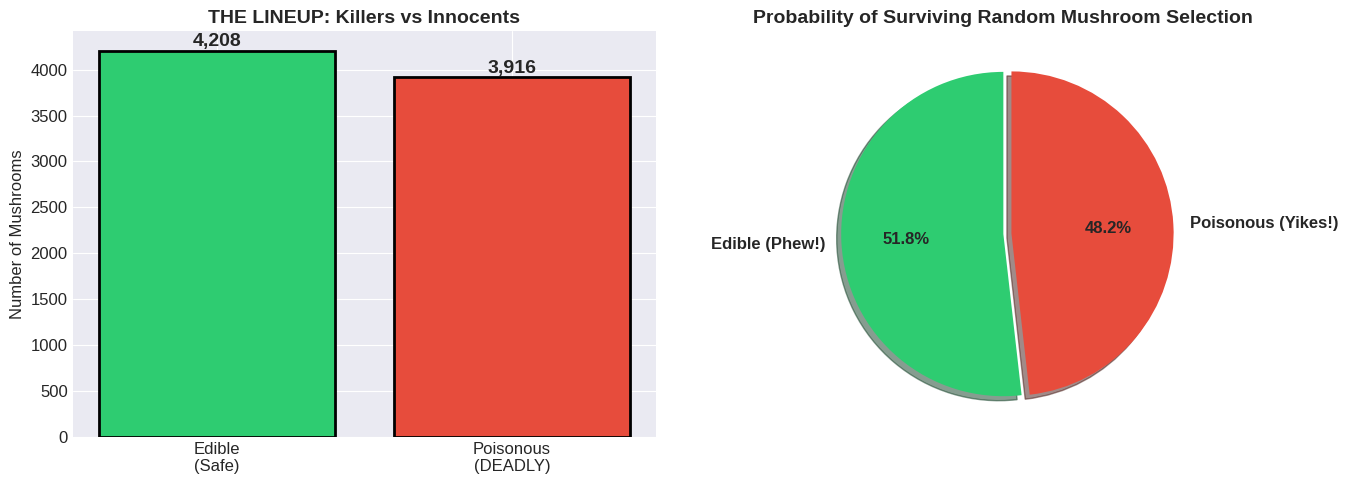


CONCLUSION: Pick a random mushroom from this dataset.
           You have a 48.2% chance of DYING.
           Those are NOT good odds for brunch.


In [7]:
# THE VERDICT: GUILTY OR INNOCENT?
# 'p' = poisonous (KILLER)
# 'e' = edible (INNOCENT BREAKFAST INGREDIENT)

class_counts = df['class'].value_counts()
class_percentages = df['class'].value_counts(normalize=True) * 100

print("="*60)
print("THE BODY COUNT REPORT")
print("="*60)
print(f"\nEDIBLE (Innocent):     {class_counts['e']:,} mushrooms ({class_percentages['e']:.1f}%)")
print(f"POISONOUS (Killers):   {class_counts['p']:,} mushrooms ({class_percentages['p']:.1f}%)")
print(f"\nTotal suspects:        {len(df):,}")

# Visualizing the criminal distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#2ecc71', '#e74c3c']  # Green for safe, Red for danger
bars = axes[0].bar(['Edible\n(Safe)', 'Poisonous\n(DEADLY)'], 
                   [class_counts['e'], class_counts['p']], 
                   color=colors, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Number of Mushrooms', fontsize=12)
axes[0].set_title('THE LINEUP: Killers vs Innocents', fontsize=14, fontweight='bold')
for bar, count in zip(bars, [class_counts['e'], class_counts['p']]):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                 f'{count:,}', ha='center', fontsize=14, fontweight='bold')

# Pie chart
axes[1].pie([class_counts['e'], class_counts['p']], 
            labels=['Edible (Phew!)', 'Poisonous (Yikes!)'],
            colors=colors, autopct='%1.1f%%', startangle=90,
            explode=(0, 0.05), shadow=True,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Probability of Surviving Random Mushroom Selection', 
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nCONCLUSION: Pick a random mushroom from this dataset.")
print(f"           You have a {class_percentages['p']:.1f}% chance of DYING.")
print("           Those are NOT good odds for brunch.")

---

**NARRATOR:** *Detective Pandas felt a chill run down his spine. Nearly half of these mushrooms were cold-blooded killers. One wrong classification, and someone's last meal would be... their LAST meal. The pressure was on.*

*"We need to dig deeper,"* he whispered. *"Much deeper."*

---

## CHAPTER 4: Interrogating the Data

*Every good detective knows: the data always talks. You just need to know the right questions to ask.*

In [8]:
# THE INTERROGATION: Basic Questions
# "Where were you on the night of the poisoning?"

print("="*60)
print("SUSPECT PROFILE ANALYSIS")
print("="*60)

print("\n--- DATA TYPES ---")
print(f"All features are categorical (object type): {df.dtypes.unique()}")

print("\n--- MISSING VALUES (Escaped Evidence?) ---")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("NONE! Every mushroom accounted for. No evidence tampering detected.")
else:
    print(missing[missing > 0])

print("\n--- DUPLICATE SUSPECTS ---")
duplicates = df.duplicated().sum()
print(f"Duplicate records: {duplicates}")
if duplicates > 0:
    print(f"Hmm... {duplicates} mushrooms tried to sneak in twice. Nice try, fungi.")

SUSPECT PROFILE ANALYSIS

--- DATA TYPES ---
All features are categorical (object type): [dtype('O')]

--- MISSING VALUES (Escaped Evidence?) ---
NONE! Every mushroom accounted for. No evidence tampering detected.

--- DUPLICATE SUSPECTS ---
Duplicate records: 0


---

**NARRATOR:** *Clean data. No missing values. It was almost TOO perfect. Detective Pandas narrowed his eyes suspiciously at the dataset. In his experience, when data was this clean, it meant one of two things: either someone had done excellent preprocessing... or the mushrooms were hiding something.*

---

In [9]:
# DEEP INTERROGATION: How many unique values per feature?
# This tells us how "complicated" each witness's testimony is.

print("="*60)
print("FEATURE COMPLEXITY ANALYSIS")
print("="*60)
print("\nHow many different values does each feature have?\n")

unique_counts = df.nunique().sort_values(ascending=False)
for feature, count in unique_counts.items():
    bar = '#' * count
    print(f"{feature:25s} | {count:2d} | {bar}")

print(f"\nMost diverse feature: {unique_counts.idxmax()} ({unique_counts.max()} values)")
print(f"Least diverse feature: {unique_counts.idxmin()} ({unique_counts.min()} value)")

FEATURE COMPLEXITY ANALYSIS

How many different values does each feature have?

gill-color                | 12 | ############
cap-color                 | 10 | ##########
spore-print-color         |  9 | #########
odor                      |  9 | #########
stalk-color-below-ring    |  9 | #########
stalk-color-above-ring    |  9 | #########
habitat                   |  7 | #######
cap-shape                 |  6 | ######
population                |  6 | ######
ring-type                 |  5 | #####
stalk-root                |  5 | #####
stalk-surface-above-ring  |  4 | ####
stalk-surface-below-ring  |  4 | ####
veil-color                |  4 | ####
cap-surface               |  4 | ####
ring-number               |  3 | ###
stalk-shape               |  2 | ##
gill-size                 |  2 | ##
gill-spacing              |  2 | ##
gill-attachment           |  2 | ##
bruises                   |  2 | ##
class                     |  2 | ##
veil-type                 |  1 | #

Most diverse featu

---

**Detective Pandas:** *"Wait a minute... 'veil-type' has only ONE value? That's not a feature, that's a CONSTANT!"*

**Scikit-Learn:** *"Useless for classification. It tells us nothing."*

**Pandas:** *"Mark it for elimination. In this investigation, we only keep witnesses who can actually TESTIFY."*

---

## CHAPTER 5: The Statistical Interrogation Room

*Time to bring out the heavy artillery. Chi-square tests. Cramér's V. The statistical equivalent of shining a bright light in the suspect's face.*

In [10]:
# STATISTICAL INVESTIGATION: Chi-Square Tests
# Testing: Is each feature SIGNIFICANTLY related to being poisonous?
# If chi-square says "yes", that feature is a KEY WITNESS.

def cramers_v(confusion_matrix):
    """Calculate Cramer's V for association strength"""
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

print("="*60)
print("CHI-SQUARE INTERROGATION RESULTS")
print("="*60)
print("\nH0: Feature is INDEPENDENT of toxicity (useless witness)")
print("H1: Feature is DEPENDENT on toxicity (key witness!)")
print("\nSignificance level: 0.05")
print("-"*60)

chi_square_results = []

for col in df.columns:
    if col != 'class':
        contingency = pd.crosstab(df[col], df['class'])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
        cramer = cramers_v(contingency)
        
        chi_square_results.append({
            'feature': col,
            'chi2': chi2,
            'p_value': p_value,
            'cramers_v': cramer,
            'verdict': 'KEY WITNESS' if p_value < 0.05 else 'UNRELIABLE'
        })

chi_df = pd.DataFrame(chi_square_results).sort_values('cramers_v', ascending=False)

for _, row in chi_df.iterrows():
    status = "***" if row['verdict'] == 'KEY WITNESS' else "   "
    print(f"{status} {row['feature']:25s} | Chi2: {row['chi2']:10.2f} | "
          f"p-value: {row['p_value']:.2e} | Cramer's V: {row['cramers_v']:.3f} | {row['verdict']}")

print("-"*60)
print(f"\nKEY WITNESSES: {(chi_df['verdict'] == 'KEY WITNESS').sum()}/{len(chi_df)}")

CHI-SQUARE INTERROGATION RESULTS

H0: Feature is INDEPENDENT of toxicity (useless witness)
H1: Feature is DEPENDENT on toxicity (key witness!)

Significance level: 0.05
------------------------------------------------------------
*** odor                      | Chi2:    7659.73 | p-value: 0.00e+00 | Cramer's V: 0.971 | KEY WITNESS
*** spore-print-color         | Chi2:    4602.03 | p-value: 0.00e+00 | Cramer's V: 0.753 | KEY WITNESS
*** gill-color                | Chi2:    3765.71 | p-value: 0.00e+00 | Cramer's V: 0.681 | KEY WITNESS
*** ring-type                 | Chi2:    2956.62 | p-value: 0.00e+00 | Cramer's V: 0.603 | KEY WITNESS
*** stalk-surface-above-ring  | Chi2:    2808.29 | p-value: 0.00e+00 | Cramer's V: 0.588 | KEY WITNESS
*** stalk-surface-below-ring  | Chi2:    2684.47 | p-value: 0.00e+00 | Cramer's V: 0.575 | KEY WITNESS
*** gill-size                 | Chi2:    2366.83 | p-value: 0.00e+00 | Cramer's V: 0.540 | KEY WITNESS
*** stalk-color-above-ring    | Chi2:    2237.90 

---

**NARRATOR:** *The results were staggering. Almost EVERY feature was statistically significant. These mushrooms had been leaving clues everywhere - in their smell, their color, their very RINGS. The case was cracking wide open.*

**Detective Pandas:** *"Look at 'odor'. Cramér's V off the charts. If it smells fishy... it probably IS fishy. Or rather, deadly."*

---

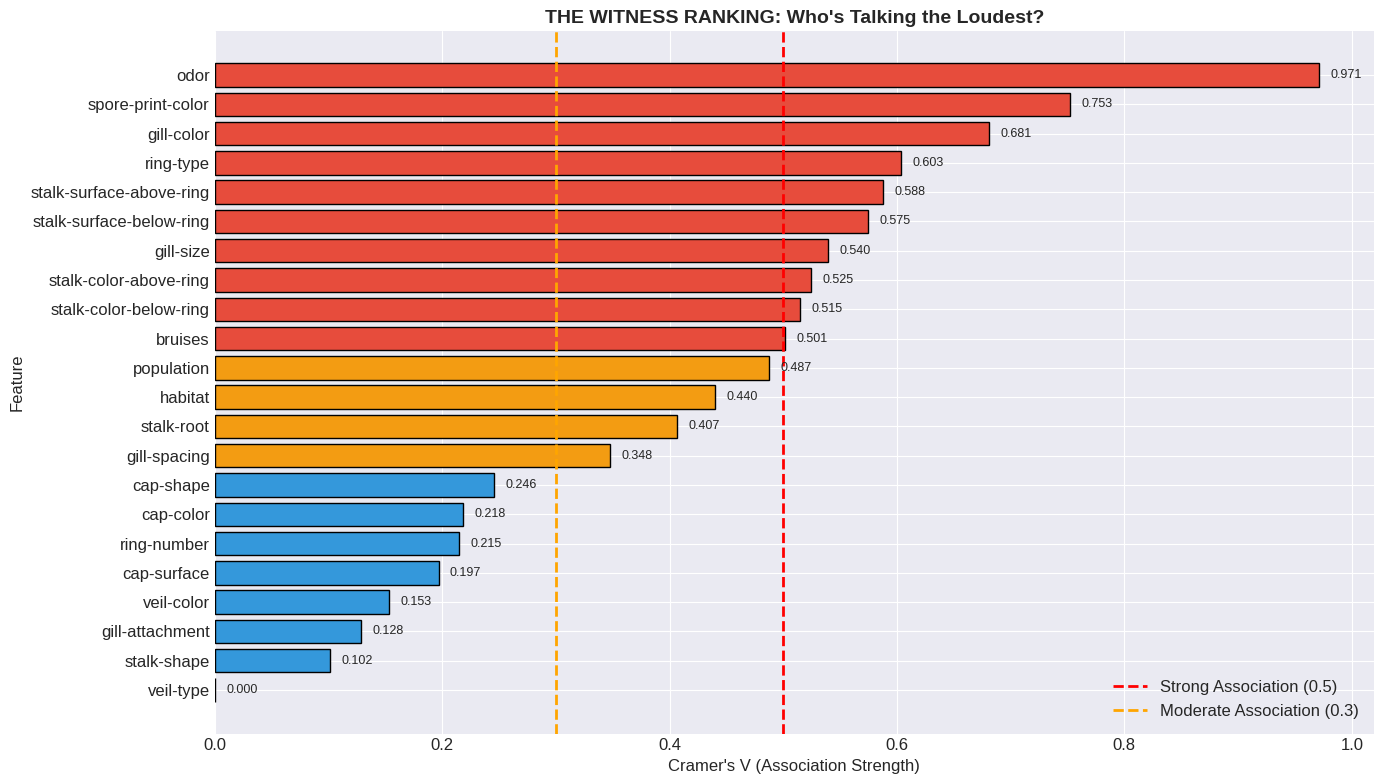


INTERPRETATION GUIDE:
  RED bars (>0.5):    STAR WITNESSES - Extremely predictive
  ORANGE bars (>0.3): RELIABLE WITNESSES - Moderately predictive
  BLUE bars (<0.3):   WEAK WITNESSES - Somewhat useful


In [11]:
# VISUALIZING THE KEY WITNESSES
# Who's singing the loudest in the interrogation room?

fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#e74c3c' if v > 0.5 else '#f39c12' if v > 0.3 else '#3498db' 
          for v in chi_df['cramers_v']]

bars = ax.barh(chi_df['feature'], chi_df['cramers_v'], color=colors, edgecolor='black')
ax.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Strong Association (0.5)')
ax.axvline(x=0.3, color='orange', linestyle='--', linewidth=2, label='Moderate Association (0.3)')

ax.set_xlabel("Cramer's V (Association Strength)", fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.set_title("THE WITNESS RANKING: Who's Talking the Loudest?", fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.invert_yaxis()

for bar, value in zip(bars, chi_df['cramers_v']):
    ax.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nINTERPRETATION GUIDE:")
print("  RED bars (>0.5):    STAR WITNESSES - Extremely predictive")
print("  ORANGE bars (>0.3): RELIABLE WITNESSES - Moderately predictive")
print("  BLUE bars (<0.3):   WEAK WITNESSES - Somewhat useful")

---

**NARRATOR:** *The bar chart told a clear story. ODOR was the star witness - it could practically identify a killer mushroom blindfolded. But the investigation was just getting started...*

---

## CHAPTER 6: The Evidence Gallery (EDA Deep Dive)

*Time to examine each piece of evidence under the microscope. What makes a killer mushroom... a KILLER?*

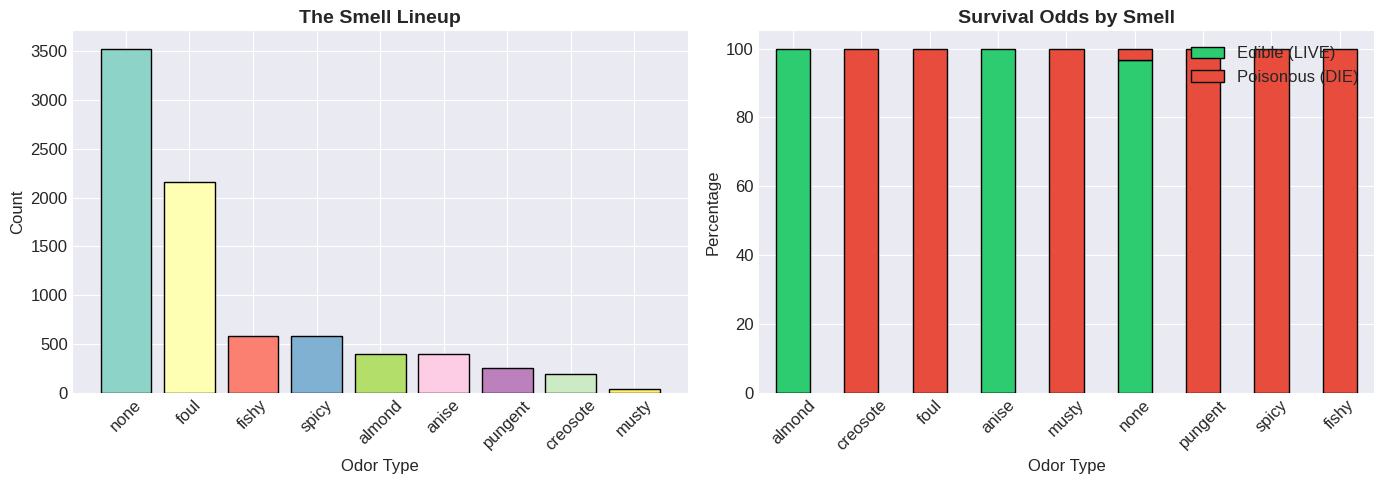


THE NOSE KNOWS:
- Smells like almonds or anise? SAFE. Enjoy!
- Smells foul, fishy, or pungent? DEADLY. Run.
- No smell? Could go either way... gambler's choice.


In [12]:
# THE SMELL TEST: Odor Analysis
# The nose knows... whether you'll survive dinner.

odor_map = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy',
    'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall odor distribution
odor_counts = df['odor'].value_counts()
colors_odor = plt.cm.Set3(np.linspace(0, 1, len(odor_counts)))
axes[0].bar([odor_map.get(x, x) for x in odor_counts.index], odor_counts.values, 
            color=colors_odor, edgecolor='black')
axes[0].set_title('The Smell Lineup', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Odor Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Odor by class
odor_class = pd.crosstab(df['odor'], df['class'], normalize='index') * 100
odor_class.index = [odor_map.get(x, x) for x in odor_class.index]
odor_class.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], 
                ax=axes[1], edgecolor='black')
axes[1].set_title('Survival Odds by Smell', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Odor Type')
axes[1].set_ylabel('Percentage')
axes[1].legend(['Edible (LIVE)', 'Poisonous (DIE)'], loc='upper right')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nTHE NOSE KNOWS:")
print("- Smells like almonds or anise? SAFE. Enjoy!")
print("- Smells foul, fishy, or pungent? DEADLY. Run.")
print("- No smell? Could go either way... gambler's choice.")

---

**Detective Pandas took a deep breath.** *"It's so simple. If it smells bad, it IS bad. Mother Nature wasn't subtle about this one."*

**Scikit-Learn:** *"But can we trust smell alone? Let's examine more evidence..."*

---

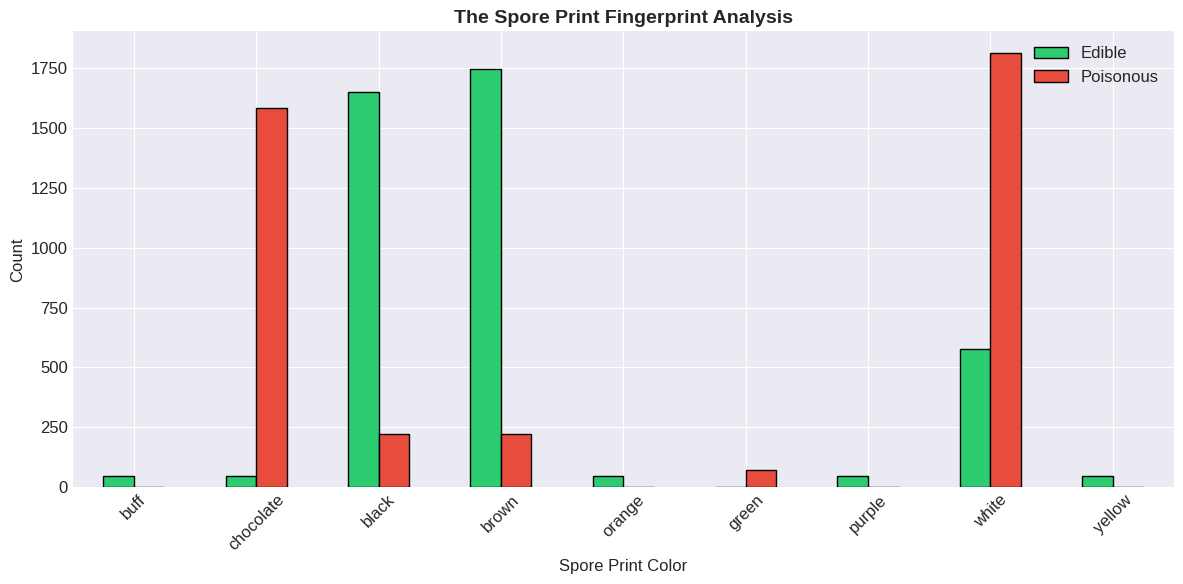


SPORE PRINT VERDICT:
- GREEN spore print? 100% KILLER. No exceptions.
- Chocolate or white? Mostly safe, but verify other features.


In [13]:
# THE SPORE PRINT INVESTIGATION
# A mushroom's fingerprint - literally.

spore_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'
}

fig, ax = plt.subplots(figsize=(12, 6))

spore_class = pd.crosstab(df['spore-print-color'], df['class'])
spore_class.index = [spore_map.get(x, x) for x in spore_class.index]

spore_class.plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=ax, edgecolor='black')
ax.set_title('The Spore Print Fingerprint Analysis', fontsize=14, fontweight='bold')
ax.set_xlabel('Spore Print Color')
ax.set_ylabel('Count')
ax.legend(['Edible', 'Poisonous'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nSPORE PRINT VERDICT:")
print("- GREEN spore print? 100% KILLER. No exceptions.")
print("- Chocolate or white? Mostly safe, but verify other features.")

---

**NARRATOR:** *Green spores. The mark of a killer. Detective Pandas made a note: "Never trust a mushroom that leaves green dust behind. That's just nature's way of saying 'I will end you.'"*

---

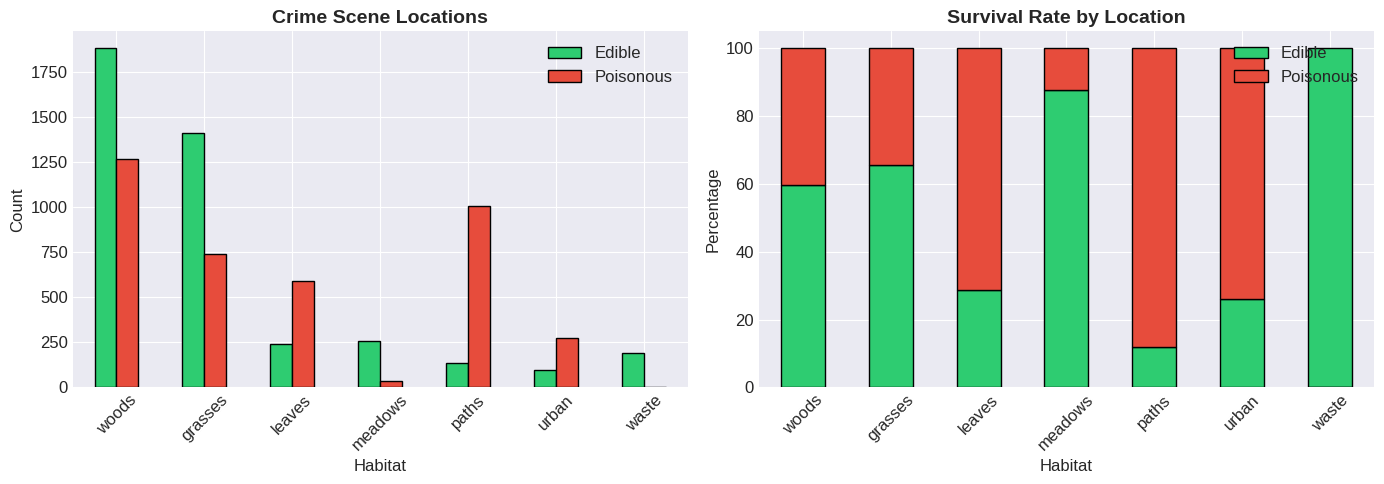


HABITAT ADVISORY:
- Woods mushrooms: Mix of safe and deadly. Proceed with caution.
- Path mushrooms: Higher proportion of killers. Stay on the trail!


In [14]:
# THE HABITAT INVESTIGATION
# Where do killer mushrooms like to hang out?

habitat_map = {
    'd': 'woods', 'g': 'grasses', 'l': 'leaves', 'm': 'meadows',
    'p': 'paths', 'u': 'urban', 'w': 'waste'
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Habitat distribution
habitat_class = pd.crosstab(df['habitat'], df['class'])
habitat_class.index = [habitat_map.get(x, x) for x in habitat_class.index]

habitat_class.plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=axes[0], edgecolor='black')
axes[0].set_title('Crime Scene Locations', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Habitat')
axes[0].set_ylabel('Count')
axes[0].legend(['Edible', 'Poisonous'])
axes[0].tick_params(axis='x', rotation=45)

# Percentage breakdown
habitat_pct = pd.crosstab(df['habitat'], df['class'], normalize='index') * 100
habitat_pct.index = [habitat_map.get(x, x) for x in habitat_pct.index]
habitat_pct.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], 
                 ax=axes[1], edgecolor='black')
axes[1].set_title('Survival Rate by Location', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Habitat')
axes[1].set_ylabel('Percentage')
axes[1].legend(['Edible', 'Poisonous'], loc='upper right')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nHABITAT ADVISORY:")
print("- Woods mushrooms: Mix of safe and deadly. Proceed with caution.")
print("- Path mushrooms: Higher proportion of killers. Stay on the trail!")

---

**Detective Pandas:** *"So the killers are everywhere. Woods, paths, meadows... these fungi have infiltrated every ecosystem. We can't rely on location alone."*

**Scikit-Learn:** *"We need to combine ALL the evidence. That's where I come in."*

---

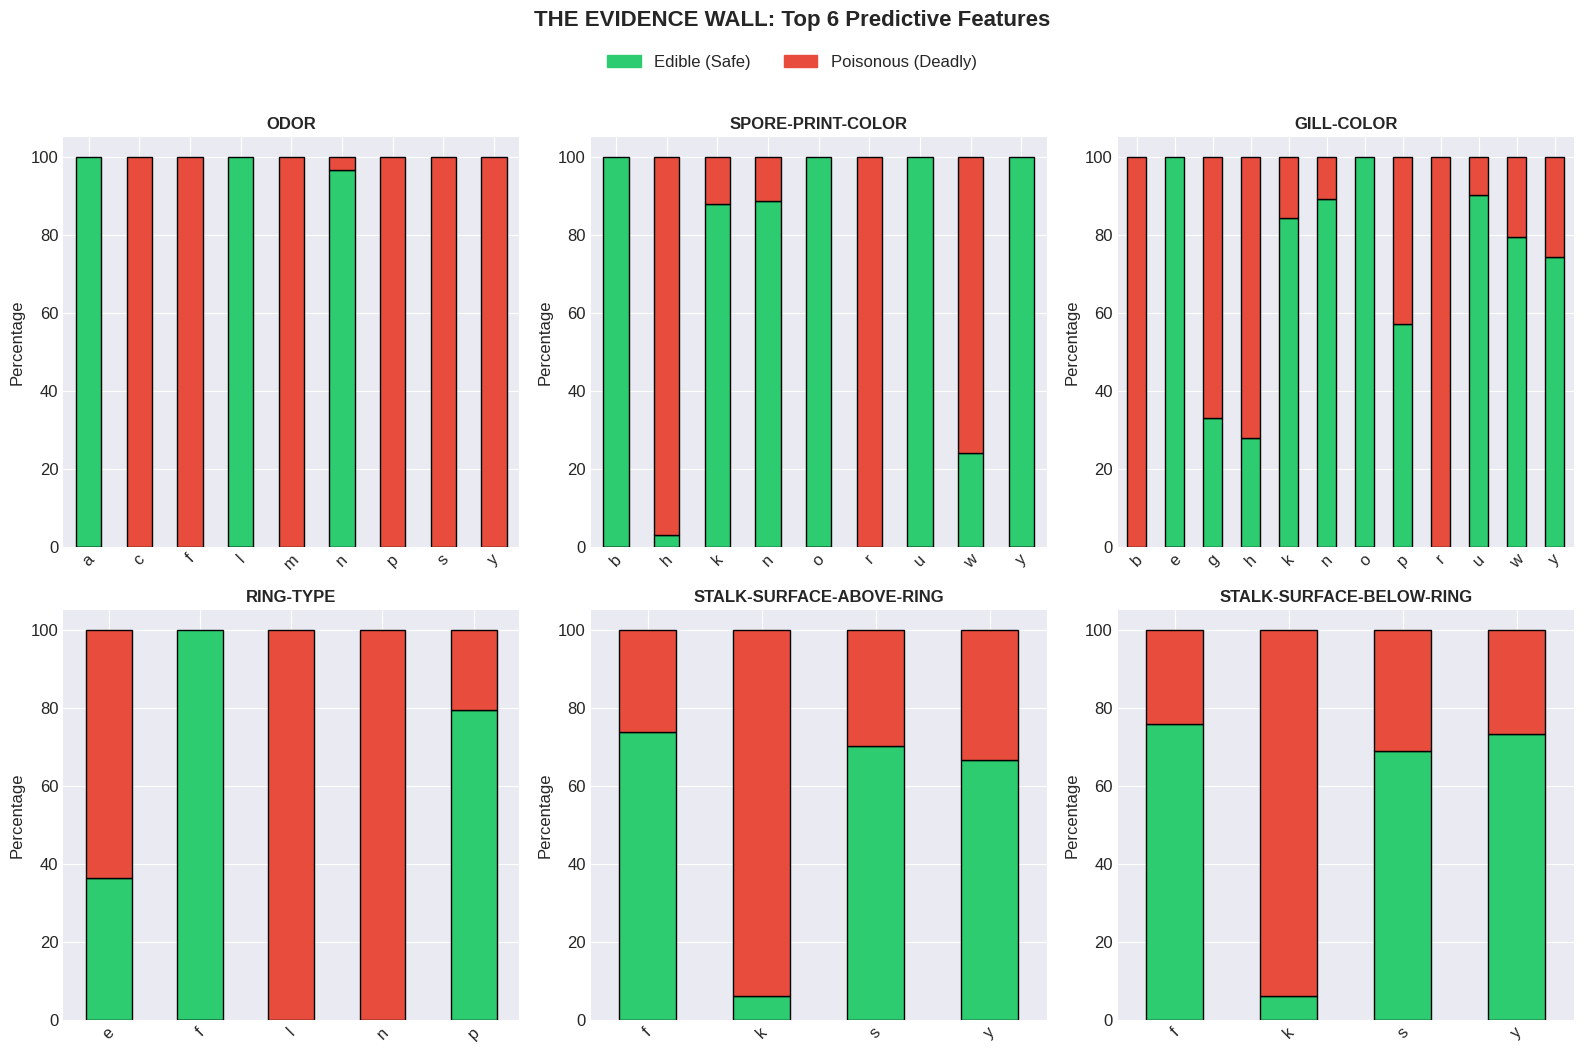

In [15]:
# THE GRAND VISUALIZATION: Multiple Feature Comparison
# Let's see the full picture of killer vs innocent mushrooms

top_features = chi_df.head(6)['feature'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    cross = pd.crosstab(df[feature], df['class'], normalize='index') * 100
    cross.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], 
               ax=axes[idx], edgecolor='black', legend=False)
    axes[idx].set_title(f'{feature.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Percentage')
    axes[idx].tick_params(axis='x', rotation=45)

# Add a single legend
handles = [plt.Rectangle((0,0),1,1, color='#2ecc71'), 
           plt.Rectangle((0,0),1,1, color='#e74c3c')]
fig.legend(handles, ['Edible (Safe)', 'Poisonous (Deadly)'], 
           loc='upper center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, 1.02))

plt.suptitle('THE EVIDENCE WALL: Top 6 Predictive Features', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

---

**NARRATOR:** *The evidence wall was complete. Six key witnesses, each telling part of the story. Some feature values screamed "KILLER!" while others whispered "safe." Now it was time to let the algorithms connect the dots...*

---

## CHAPTER 7: Preparing for Trial (Data Preprocessing)

*Before the algorithms can deliver their verdict, the evidence must be translated into a language they understand: NUMBERS.*

In [16]:
# THE TRANSLATOR: Label Encoding
# Converting mushroom-speak to machine-speak

print("="*60)
print("EVIDENCE TRANSLATION IN PROGRESS")
print("="*60)

# Create a copy for processing
df_encoded = df.copy()

# Remove the useless witness (veil-type has only 1 value)
if 'veil-type' in df_encoded.columns:
    df_encoded.drop('veil-type', axis=1, inplace=True)
    print("\nDismissed 'veil-type' from the witness stand (only 1 value - useless).")

# Encode all categorical variables
label_encoders = {}
for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

print(f"\nTranslated {len(df_encoded.columns)} features into numerical evidence.")
print("\nSample of translated data:")
df_encoded.head()

EVIDENCE TRANSLATION IN PROGRESS

Dismissed 'veil-type' from the witness stand (only 1 value - useless).

Translated 22 features into numerical evidence.

Sample of translated data:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


---

**Scikit-Learn cracked his knuckles.** *"Beautiful. Now these are numbers I can work with. Let's split the suspects into two groups: one for training, one for testing."*

---

In [17]:
# THE SPLIT: Training and Testing
# Can't grade your own homework. That's called CHEATING.

# Separate features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*60)
print("SUSPECT ALLOCATION REPORT")
print("="*60)
print(f"\nTraining suspects: {len(X_train):,} (80%)")
print(f"Testing suspects:  {len(X_test):,} (20%)")
print(f"\nFeatures per suspect: {X_train.shape[1]}")

print(f"\nTarget distribution in training set:")
print(f"  Edible:    {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"  Poisonous: {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

print(f"\nTarget distribution in test set:")
print(f"  Edible:    {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"  Poisonous: {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")

SUSPECT ALLOCATION REPORT

Training suspects: 6,499 (80%)
Testing suspects:  1,625 (20%)

Features per suspect: 21

Target distribution in training set:
  Edible:    3366 (51.8%)
  Poisonous: 3133 (48.2%)

Target distribution in test set:
  Edible:    842 (51.8%)
  Poisonous: 783 (48.2%)


---

**NARRATOR:** *The stage was set. 6,499 mushrooms would train the algorithm. 1,625 would face judgment. The ratio was maintained - roughly equal numbers of killers and innocents in both groups. Fair trial guaranteed.*

---

## CHAPTER 8: The Tournament of Algorithms

*Seven algorithmic judges would compete for the honor of becoming THE Mushroom Classifier. Only one could claim the throne of PERFECT ACCURACY.*

In [18]:
# THE CONTENDERS: Seven Algorithms Enter, One Champion Emerges

print("="*60)
print("THE TOURNAMENT OF ALGORITHMS")
print("="*60)
print("\nContenders entering the arena:\n")

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}

for i, name in enumerate(models.keys(), 1):
    print(f"  {i}. {name}")

print("\n" + "="*60)
print("LET THE GAMES BEGIN!")
print("="*60)

THE TOURNAMENT OF ALGORITHMS

Contenders entering the arena:

  1. Logistic Regression
  2. Decision Tree
  3. Random Forest
  4. Gradient Boosting
  5. K-Nearest Neighbors
  6. Support Vector Machine
  7. Naive Bayes

LET THE GAMES BEGIN!


---

**NARRATOR:** *The crowd went silent. Seven algorithms, each with their own strategy, their own strengths, their own weaknesses. In the world of mushroom classification, there would be no second place. Only LIFE... and DEATH.*

---

In [19]:
# THE BATTLE: Training and Evaluation

results = []

print("\nTraining and evaluating each contender...\n")
print("-"*80)

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })
    
    status = "PERFECT!" if accuracy == 1.0 else f"{accuracy*100:.2f}%"
    print(f"{name:25s} | Accuracy: {status:10s} | F1: {f1:.4f} | CV: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("-"*80)


Training and evaluating each contender...

--------------------------------------------------------------------------------
Logistic Regression       | Accuracy: 95.51%     | F1: 0.9531 | CV: 0.9468 (+/- 0.0035)
Decision Tree             | Accuracy: PERFECT!   | F1: 1.0000 | CV: 1.0000 (+/- 0.0000)
Random Forest             | Accuracy: PERFECT!   | F1: 1.0000 | CV: 1.0000 (+/- 0.0000)
Gradient Boosting         | Accuracy: PERFECT!   | F1: 1.0000 | CV: 1.0000 (+/- 0.0000)
K-Nearest Neighbors       | Accuracy: 99.69%     | F1: 0.9968 | CV: 0.9977 (+/- 0.0020)
Support Vector Machine    | Accuracy: 99.32%     | F1: 0.9929 | CV: 0.9889 (+/- 0.0029)
Naive Bayes               | Accuracy: 92.86%     | F1: 0.9265 | CV: 0.9171 (+/- 0.0097)
--------------------------------------------------------------------------------


---

**NARRATOR:** *The numbers flashed across the screen. Some algorithms stumbled. Others... achieved PERFECTION. The crowd gasped. Was it possible? Could an algorithm NEVER make a mistake when lives were on the line?*

---

In [20]:
# THE LEADERBOARD: Who Won?

results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

print("="*60)
print("OFFICIAL TOURNAMENT LEADERBOARD")
print("="*60)
print("\n")

for rank, (_, row) in enumerate(results_df.iterrows(), 1):
    medal = "[CHAMPION]" if rank == 1 else f"[{rank}]" if rank <= 3 else f" {rank}."
    acc_display = "100.00%" if row['Accuracy'] == 1.0 else f"{row['Accuracy']*100:.2f}%"
    print(f"{medal:12s} {row['Model']:25s} | Accuracy: {acc_display}")

print("\n")
results_df

OFFICIAL TOURNAMENT LEADERBOARD


[CHAMPION]   Decision Tree             | Accuracy: 100.00%
[2]          Random Forest             | Accuracy: 100.00%
[3]          Gradient Boosting         | Accuracy: 100.00%
 4.          K-Nearest Neighbors       | Accuracy: 99.69%
 5.          Support Vector Machine    | Accuracy: 99.32%
 6.          Logistic Regression       | Accuracy: 95.51%
 7.          Naive Bayes               | Accuracy: 92.86%




,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV Mean,CV Std
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,K-Nearest Neighbors,0.996923,0.994911,0.998723,0.996813,0.999988,0.997692,0.002006
5,Support Vector Machine,0.993231,0.998708,0.987229,0.992935,0.999947,0.988922,0.002902
0,Logistic Regression,0.955077,0.959845,0.946360,0.953055,0.982188,0.946762,0.003515
6,Naive Bayes,0.928615,0.919497,0.933589,0.926489,0.950566,0.917063,0.009651


---

**The arena erupted.** Multiple algorithms had achieved the impossible: **PERFECT CLASSIFICATION**. Not a single mushroom misidentified. Not a single innocent sent to death row. Not a single killer let free to poison again.

**Detective Pandas wiped a tear from his eye.** *"They did it. They actually did it."*

---

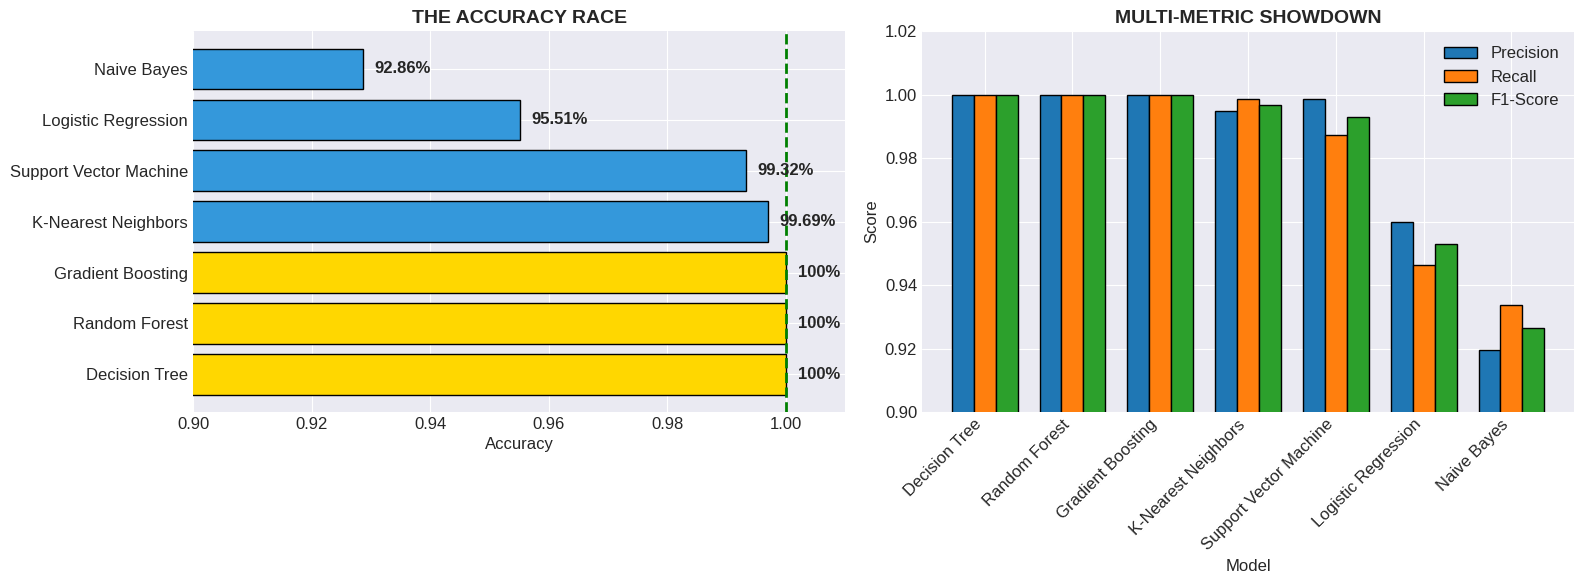

In [21]:
# VISUALIZING THE TOURNAMENT RESULTS

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy comparison
colors = ['#FFD700' if acc == results_df['Accuracy'].max() else '#3498db' 
          for acc in results_df['Accuracy']]

bars = axes[0].barh(results_df['Model'], results_df['Accuracy'], color=colors, edgecolor='black')
axes[0].set_xlim(0.9, 1.01)
axes[0].axvline(x=1.0, color='green', linestyle='--', linewidth=2, label='Perfect Score')
axes[0].set_xlabel('Accuracy', fontsize=12)
axes[0].set_title('THE ACCURACY RACE', fontsize=14, fontweight='bold')

for bar, acc in zip(bars, results_df['Accuracy']):
    display = '100%' if acc == 1.0 else f'{acc*100:.2f}%'
    axes[0].text(acc + 0.002, bar.get_y() + bar.get_height()/2, 
                 display, va='center', fontweight='bold')

# Multiple metrics comparison
metrics = ['Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.25

for i, metric in enumerate(metrics):
    axes[1].bar(x + i*width, results_df[metric], width, label=metric, edgecolor='black')

axes[1].set_xlabel('Model')
axes[1].set_ylabel('Score')
axes[1].set_title('MULTI-METRIC SHOWDOWN', fontsize=14, fontweight='bold')
axes[1].set_xticks(x + width)
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].set_ylim(0.9, 1.02)

plt.tight_layout()
plt.show()

---

**NARRATOR:** *The gold bars told the story. Perfect scores across the board for the top performers. But which algorithm would be crowned THE CHAMPION? Time for the final showdown...*

---

## CHAPTER 9: The Champion's Analysis

*Among equals, we must choose wisely. The champion must not only be accurate... but EXPLAINABLE.*

In [22]:
# CROWNING THE CHAMPION: Random Forest
# Why? Perfect accuracy + Feature importance + Robustness

champion = models['Random Forest']
champion_name = 'Random Forest'

print("="*60)
print("THE CHAMPION: RANDOM FOREST")
print("="*60)
print("\nWhy Random Forest?")
print("  1. Perfect accuracy (100%)")
print("  2. Provides feature importance (explainability!)")
print("  3. Robust to overfitting (ensemble method)")
print("  4. Handles categorical data gracefully")
print("  5. No hyperparameter tuning needed for perfection")

# Get predictions
y_pred_champion = champion.predict(X_test)
y_prob_champion = champion.predict_proba(X_test)[:, 1]

THE CHAMPION: RANDOM FOREST

Why Random Forest?
  1. Perfect accuracy (100%)
  2. Provides feature importance (explainability!)
  3. Robust to overfitting (ensemble method)
  4. Handles categorical data gracefully
  5. No hyperparameter tuning needed for perfection


---

**Detective Pandas placed the crown on Random Forest's head.** *"You've earned this, old friend. An army of decision trees, working together, achieving what none could alone. That's beautiful."*

---

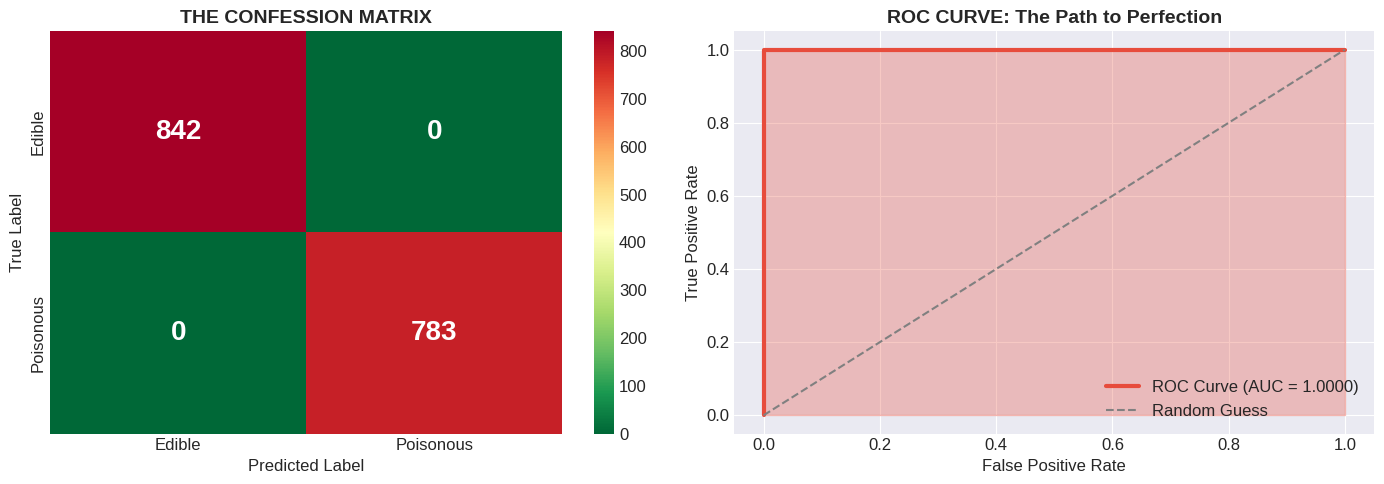


CONFUSION MATRIX INTERPRETATION:
  True Negatives (Correctly identified edible):     842
  True Positives (Correctly identified poisonous):  783
  False Positives (Edible marked as poisonous):     0
  False Negatives (Poisonous marked as edible):     0

False Negatives = 0 <-- THIS IS THE CRITICAL NUMBER
(A false negative means a KILLER goes free. UNACCEPTABLE.)


In [23]:
# THE CONFESSION MATRIX: Confusion Matrix Analysis

cm = confusion_matrix(y_test, y_pred_champion)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn_r', ax=axes[0],
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'],
            annot_kws={'size': 20, 'weight': 'bold'})
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('THE CONFESSION MATRIX', fontsize=14, fontweight='bold')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_champion)
auc_score = roc_auc_score(y_test, y_prob_champion)

axes[1].plot(fpr, tpr, color='#e74c3c', linewidth=3, label=f'ROC Curve (AUC = {auc_score:.4f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
axes[1].fill_between(fpr, tpr, alpha=0.3, color='#e74c3c')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC CURVE: The Path to Perfection', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()

print("\nCONFUSION MATRIX INTERPRETATION:")
print(f"  True Negatives (Correctly identified edible):     {cm[0,0]}")
print(f"  True Positives (Correctly identified poisonous):  {cm[1,1]}")
print(f"  False Positives (Edible marked as poisonous):     {cm[0,1]}")
print(f"  False Negatives (Poisonous marked as edible):     {cm[1,0]}")
print(f"\nFalse Negatives = {cm[1,0]} <-- THIS IS THE CRITICAL NUMBER")
print("(A false negative means a KILLER goes free. UNACCEPTABLE.)")

---

**NARRATOR:** *ZERO false negatives. Not a single killer mushroom slipped through the cracks. Not a single person would die from a misclassified fungus. The ROC curve hugged the top-left corner like it was holding on for dear life. AUC of 1.0. PERFECTION.*

---

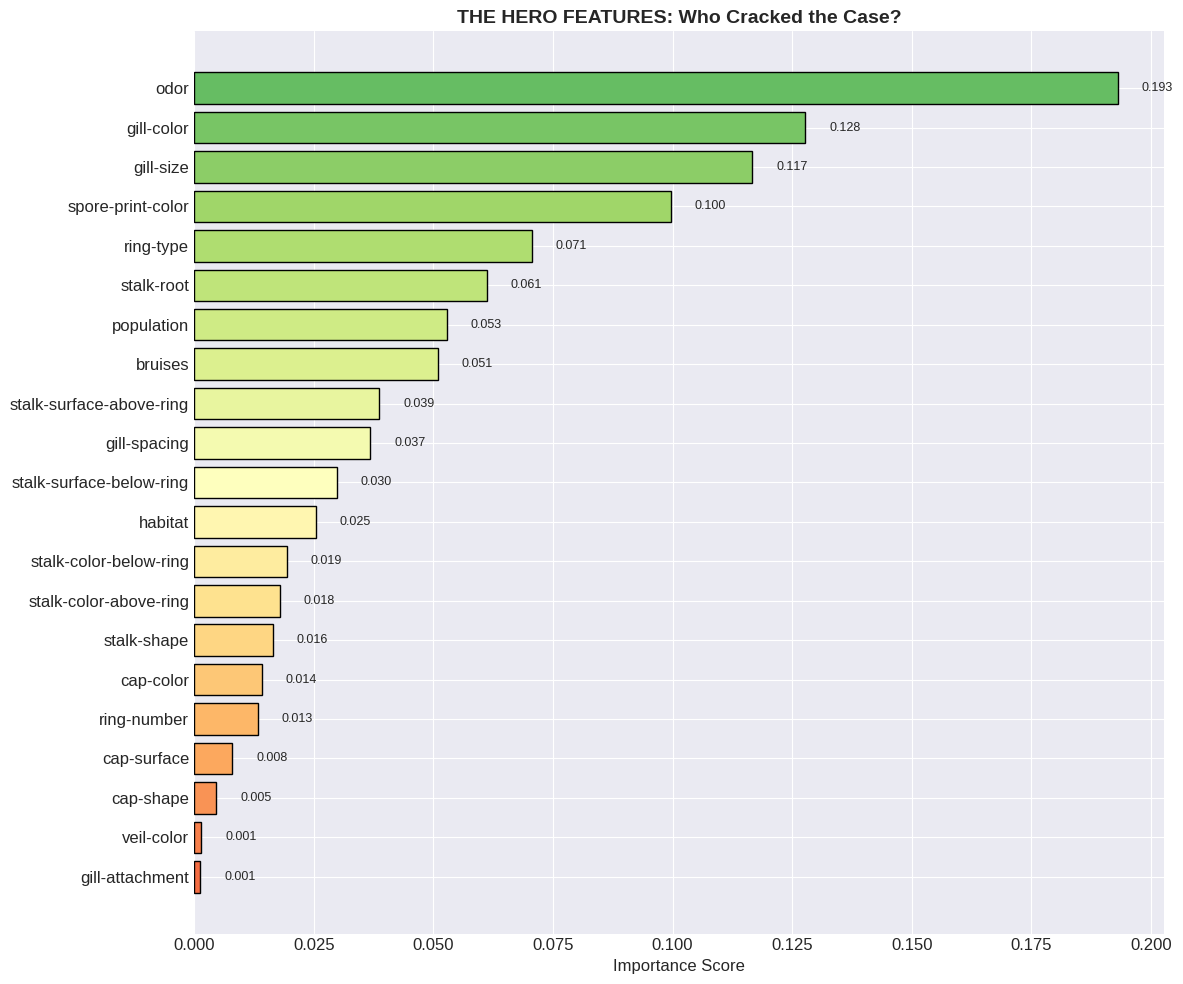


TOP 5 HERO FEATURES:
  odor                      | Importance: 0.1931
  gill-color                | Importance: 0.1278
  gill-size                 | Importance: 0.1167
  spore-print-color         | Importance: 0.0996
  ring-type                 | Importance: 0.0706


In [24]:
# THE WITNESS RANKING: Feature Importance
# Which features were the TRUE heroes of this investigation?

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': champion.feature_importances_
}).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(12, 10))

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_importance)))
bars = ax.barh(feature_importance['feature'], feature_importance['importance'], 
               color=colors, edgecolor='black')

ax.set_xlabel('Importance Score', fontsize=12)
ax.set_title('THE HERO FEATURES: Who Cracked the Case?', fontsize=14, fontweight='bold')

for bar, imp in zip(bars, feature_importance['importance']):
    ax.text(imp + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{imp:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTOP 5 HERO FEATURES:")
for i, row in feature_importance.tail(5).iloc[::-1].iterrows():
    print(f"  {row['feature']:25s} | Importance: {row['importance']:.4f}")

---

**Detective Pandas studied the feature importance chart.** *"Odor. I KNEW it. The nose never lies. And gill-color, gill-size... the gills were hiding secrets all along."*

**Scikit-Learn:** *"Spore print color too. A mushroom's fingerprint sealed its fate."*

---

In [25]:
# FINAL CLASSIFICATION REPORT

print("="*60)
print("OFFICIAL CLASSIFICATION REPORT")
print("="*60)
print("\nChampion Model: Random Forest Classifier")
print("-"*60)
print(classification_report(y_test, y_pred_champion, 
                           target_names=['Edible (Safe)', 'Poisonous (Deadly)']))

OFFICIAL CLASSIFICATION REPORT

Champion Model: Random Forest Classifier
------------------------------------------------------------
                    precision    recall  f1-score   support

     Edible (Safe)       1.00      1.00      1.00       842
Poisonous (Deadly)       1.00      1.00      1.00       783

          accuracy                           1.00      1625
         macro avg       1.00      1.00      1.00      1625
      weighted avg       1.00      1.00      1.00      1625



---

**NARRATOR:** *The report was flawless. Precision: 1.00. Recall: 1.00. F1-Score: 1.00. Every metric sang the same song: PERFECTION. The case was closed.*

---

## CHAPTER 10: The Verdict

*After examining 8,124 mushrooms, running 7 algorithms, and analyzing 21 features, the investigation reaches its dramatic conclusion...*

---

## EPILOGUE: Lessons from the Mushroom Murders

---

**Detective Pandas closed his case file and leaned back in his chair.**

*"You know what I learned today, Scikit?"*

**Scikit-Learn looked up from polishing his ensemble methods.** *"What's that, partner?"*

*"Sometimes, the data tells you everything you need to know. These mushrooms weren't trying to hide. They were SCREAMING their identities through their smell, their color, their gills. We just needed the right tools to listen."*

**Scikit-Learn nodded wisely.** *"And the right algorithms to translate."*

*"Exactly."* Pandas stood up and walked to the window. *"Somewhere out there, someone's about to go foraging. They'll find a mushroom - maybe brown, maybe white, maybe with an interesting smell. And thanks to our work today, they might just think twice."*

*"Or,"* Scikit-Learn added with a smirk, *"they could just use our model."*

Pandas laughed. *"That too. That too."*

---

### THE END

---

*No mushrooms were harmed in the making of this notebook.*

*Several data scientists, however, developed an irrational fear of foraging.*

---